# Project Task: Week 1


In [1]:
#importing required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the data
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data Cleaning

# a) Check For missing Data and formulate an apt strategy to treat them.

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#removing the null values fro CustomerID columns
df.dropna(subset=["CustomerID"],inplace=True)

In [9]:
#checking if the null valoes are removed or not
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# b) Removing duplicate data records.

In [10]:
#checking number of duplicate entries
df.duplicated().sum()

5225

In [11]:
#removing the duplicate entires
df.drop_duplicates(inplace=True)

In [12]:
#verifying if the dupliacte entires are removed
df.duplicated().sum()

0

# Removing records that have quantity value in negative

In [13]:
df=df[df['Quantity']>0]

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# Performing descriptive analytics on the given data.

In [15]:
#lets observe the first 15 distrubution of customers per country  
df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).to_frame().head(15)

,CustomerID
Country,
United Kingdom,3921
Germany,94
France,87
Spain,30
Belgium,25
Switzerland,21
Portugal,19
Italy,14
Finland,12


In [16]:
percentage=(df.groupby('Country')['CustomerID'].nunique()/df.groupby('Country')['CustomerID'].nunique().sum()).mul(100).round(2).sort_values(ascending=False).to_frame().head(15).astype(str)+'%'
percentage

,CustomerID
Country,
United Kingdom,90.2%
Germany,2.16%
France,2.0%
Spain,0.69%
Belgium,0.58%
Switzerland,0.48%
Portugal,0.44%
Italy,0.32%
Finland,0.28%


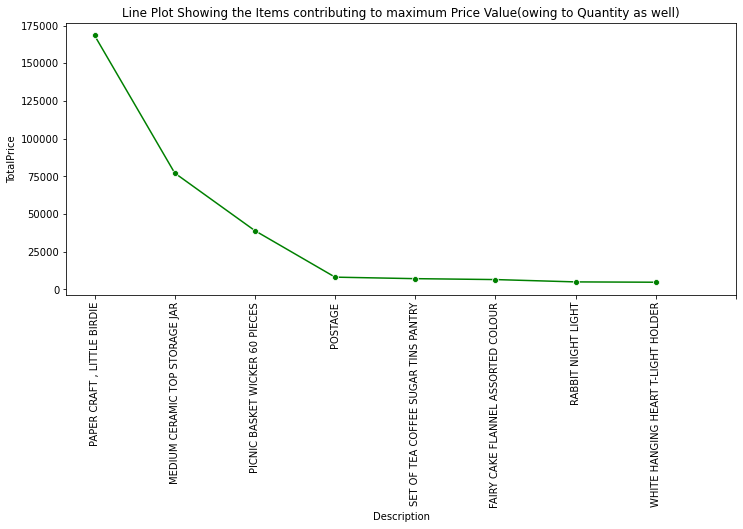

In [17]:
#Visualize the Items contributing to maximum Price Value
df['TotalPrice'] = df.Quantity * df.UnitPrice
data =df.TotalPrice.sort_values(ascending=False).head(10).to_frame().style.hide_index()
desc = df.sort_values(by='TotalPrice', ascending=False)['Description'].head(10)
price = df.sort_values(by='TotalPrice', ascending=False)['TotalPrice'].head(10)

plt.figure(figsize=(12,5))
sns.lineplot(y=price,x=desc, marker='o', color='g',).set_title('Line Plot Showing the Items contributing to maximum Price Value(owing to Quantity as well)')
plt.xticks(range(0,9), rotation=90)
plt.show();

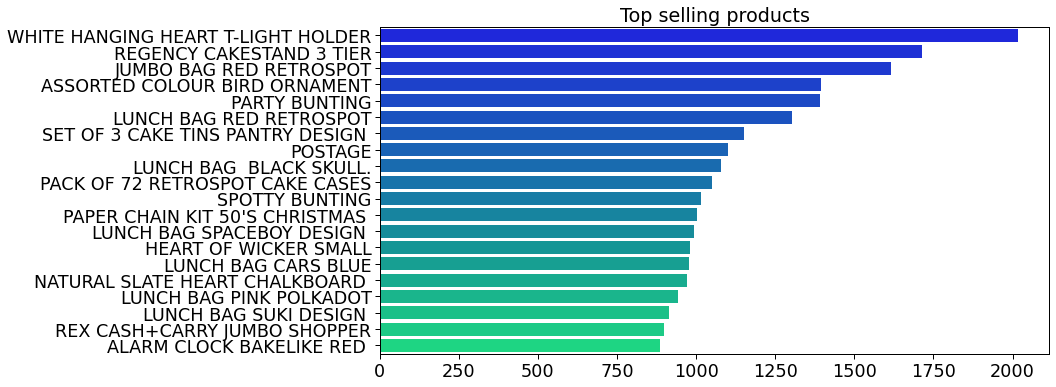

In [18]:
#Let's visualize some top products from the whole range.
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(12,6))
sns.set_context("paper", font_scale=2)
sns.barplot(y = top_products.index,
            x = top_products.values,palette='winter')
plt.title("Top selling products")
plt.show();

# Data Transformation


# Cohort Analysis

# Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 

In [19]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month) 
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [20]:
df['Cohortmonth']=df.groupby(['CustomerID'])['InvoiceMonth'].transform('min')
df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,Cohortmonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01


In [21]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(df,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(df,'Cohortmonth')


In [22]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values

df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,Cohortmonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01,5


In [23]:
cohort_data=df.groupby(['Cohortmonth','CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_data

,Cohortmonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,324
89,2011-11-01,2,36


# Analyze the retention rate of customers.

In [24]:
#creating pivot table
cohort_table=cohort_data.pivot_table(index='Cohortmonth',columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohortmonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#representing the cohort table in percentage form
cohot_table_perc=cohort_table.divide(cohort_table.iloc[:,0],axis=0)

In [26]:
#changing index
cohort_table.index=cohort_table.index.strftime('%B''%Y')

<AxesSubplot:xlabel='CohortIndex', ylabel='Cohortmonth'>

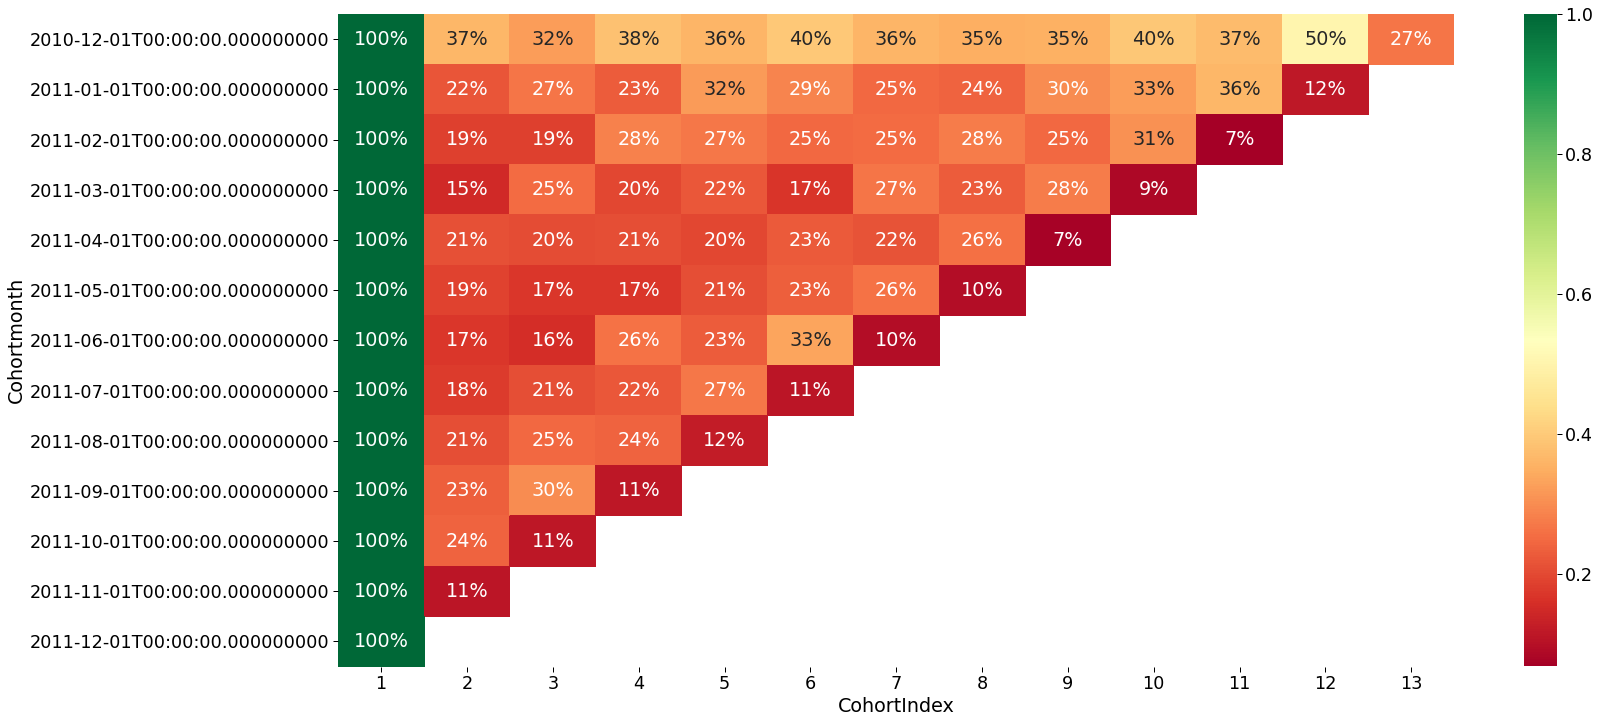

In [27]:
#visualize the result as heatmap
plt.figure(figsize=(25,12))
sns.heatmap(cohot_table_perc,annot=True,cmap='RdYlGn',fmt='.0%')

# Data Modeling :

# Build a RFM (Recency Frequency Monetary) model.

In [28]:
#Importing the required libaries
import datetime as dt
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
#Setting the latest date as 2011-12-10 as the max date of dataset is 2011-12-09.
current_date=dt.datetime(2011,12,10)

In [30]:
df['Total_price']=df.Quantity*df.UnitPrice

RFM_table=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days, 
                                       'InvoiceNo': lambda x: len(x),'Total_price': lambda x: x.sum()})
RFM_table=RFM_table.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_price': 'Monetary'})

RFM_table.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,178.05
4337,18283.0,3,721,2045.53


In [31]:
#Perforing the descripe analysis on date to understand it better
RFM_table.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

C:\Users\GENEXT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


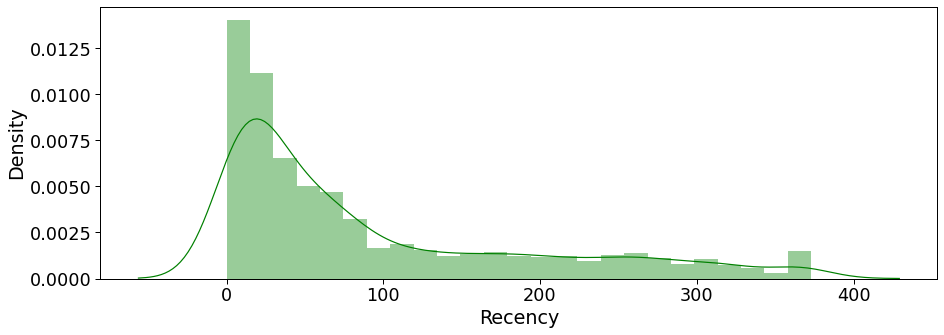

In [32]:
#frequency distribution plot
plt.figure(figsize=(15,5))
ax=sns.distplot(RFM_table['Recency'],color='g')

In [33]:
#Perforing the descripe analysis on date to understand it better
RFM_table.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

C:\Users\GENEXT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


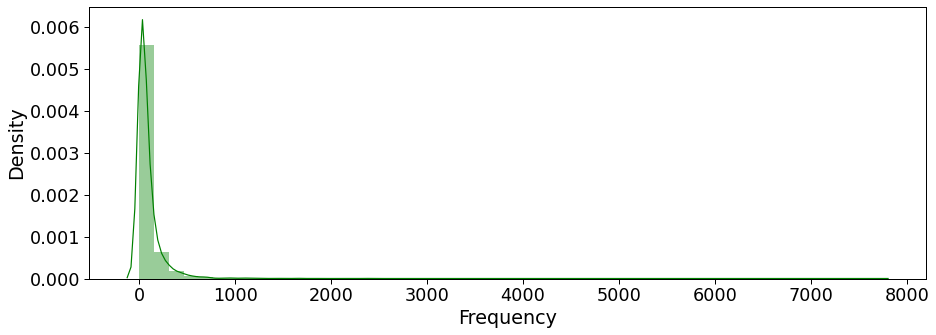

In [34]:
#frequency distribution plot
plt.figure(figsize=(15,5))

ax=sns.distplot(RFM_table['Frequency'],color='g')

In [35]:
#Perforing the descripe analysis on date to understand it better
RFM_table.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

C:\Users\GENEXT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


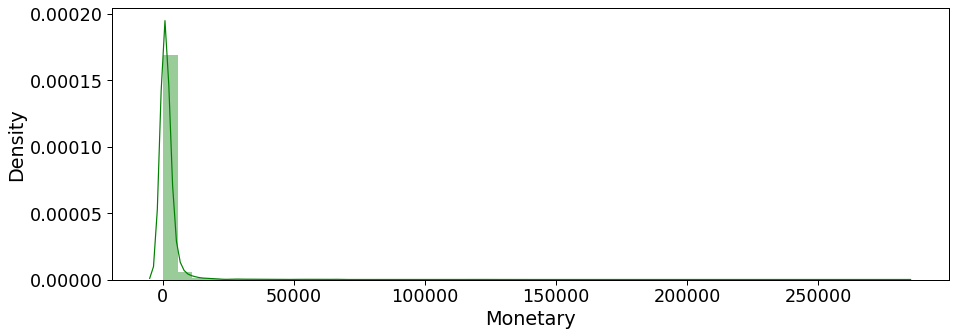

In [36]:
#frequency distribution plot
plt.figure(figsize=(15,5))

ax=sns.distplot(RFM_table['Monetary'],color='g')

In [37]:
#Dividing the RFM in quantiles
quant=RFM_table.quantile(q=[0.25,0.5,0.75])
quant.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

# Assiging RFM score 

In [38]:
def recencyscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1    

In [39]:
RFM_table['Rscore'] = RFM_table['Recency'].apply(recencyscore, args=('Recency',quant,))
RFM_table['Fscore'] = RFM_table['Frequency'].apply(fmscore, args=('Frequency',quant,))
RFM_table['Mscore'] = RFM_table['Monetary'].apply(fmscore, args=('Monetary',quant,))


RFM_table.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [40]:
RFM_table['RFMGroup'] = RFM_table.Rscore.map(str)+RFM_table.Fscore.map(str)+RFM_table.Mscore.map(str)

RFM_table['RFMScore']=RFM_table[['Rscore','Fscore','Mscore']].sum(axis=1)
RFM_table.head()

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [41]:
#Assiging customers to each sectionsas per the loyality
Segmentaion=['Platinium','Gold','Silver','Bronze']
cuts=pd.qcut(RFM_table.RFMScore,q=4,labels=Segmentaion)
RFM_table['Customer Segment']=cuts.values
RFM_table.head(5)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore,Customer Segment
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver
12347.0,2,182,4310.00,1,1,1,111,3,Platinium
12348.0,75,31,1797.24,3,3,1,331,7,Gold
12349.0,18,73,1757.55,2,2,1,221,5,Platinium
12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [42]:
#Describing the RFMscore as per the customer behaviour
pd.set_option("display.max_colwidth", 10000)
data = {'Customer Segement':['Best Customers', 'Loyal Customers', 'Big Spender', 'Almost Lost','Lost Customers','Lost Cheap Customers'], 
        'RFM':['111', 'X1X', 'XX1', '311','411','444'],
        'Desrciption':['Bought Most Recently and More Often', 'Buy Most Frequently', 'Spend The Most', 
                       'Did not purchased for some time but purchased frequently and most',
                       'Did not purchased for some time but purchased frequently and most','Last purchased long ago,purchased few and spent little']}
pd.DataFrame(data)

,Customer Segement,RFM,Desrciption
0,Best Customers,111,Bought Most Recently and More Often
1,Loyal Customers,X1X,Buy Most Frequently
2,Big Spender,XX1,Spend The Most
3,Almost Lost,311,Did not purchased for some time but purchased frequently and most
4,Lost Customers,411,Did not purchased for some time but purchased frequently and most
5,Lost Cheap Customers,444,"Last purchased long ago,purchased few and spent little"


# Week 2 

# Create clusters using k-means clustering algorithm.

In [43]:
#importing required libaries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
cluster=RFM_table
cluster=cluster.reset_index(level=0).iloc[:,[1,2,3]]
cluster

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,182,4310.00
2,75,31,1797.24
3,18,73,1757.55
4,310,17,334.40
...,...,...,...
4334,277,10,180.60
4335,180,7,80.82
4336,7,12,178.05
4337,3,721,2045.53


In [48]:
cluster.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


In [49]:
#Standarding the data
sc=StandardScaler()
standard=sc.fit_transform(cluster)
standard= pd.DataFrame(data=standard, index=cluster.index, columns=cluster.columns)
standard

,Recency,Frequency,Monetary
0,2.329673,-0.396968,8.363977
1,-0.900449,0.405730,0.251779
2,-0.170421,-0.263924,-0.027938
3,-0.740443,-0.077663,-0.032357
4,2.179667,-0.326011,-0.190780
...,...,...,...
4334,1.849655,-0.357055,-0.207901
4335,0.879618,-0.370359,-0.219008
4336,-0.850447,-0.348185,-0.208185
4337,-0.890448,2.796087,-0.000299


C:\Users\GENEXT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GENEXT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GENEXT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

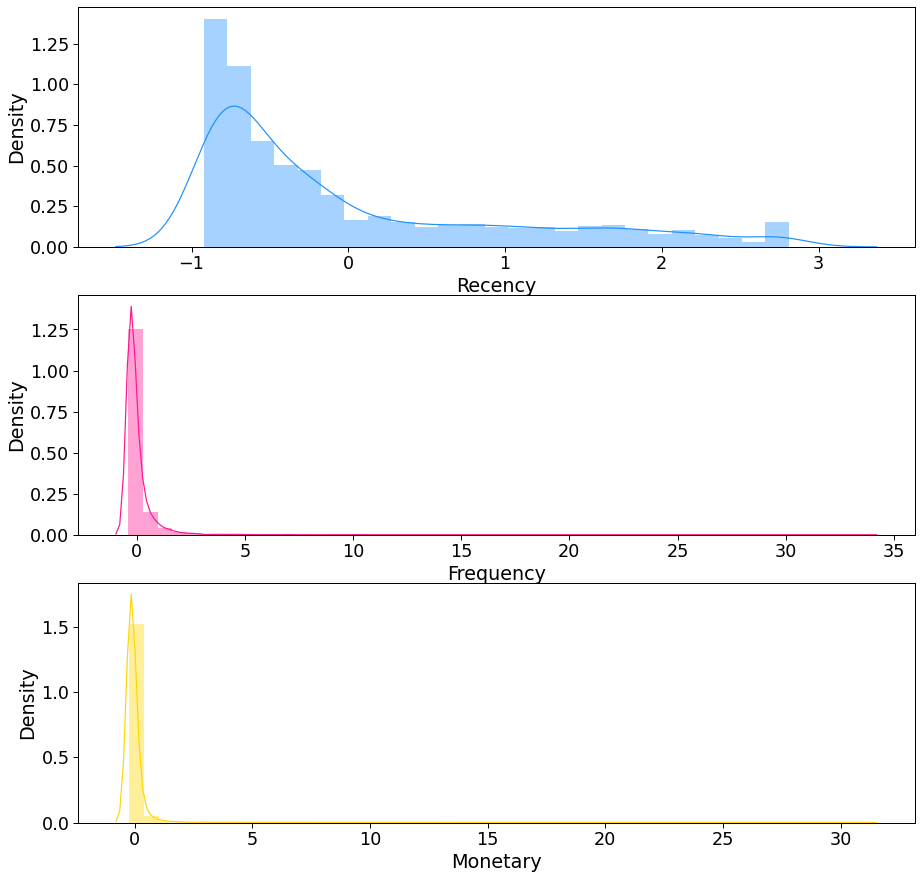

In [50]:
# Distribution plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(standard.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(standard.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(standard.Monetary , color="gold", ax=axes[2], axlabel='Monetary')

plt.show();

# Decide the optimum number of clusters to be formed.

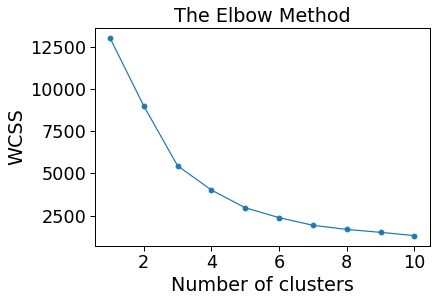

In [51]:
#using elobow method to fing the number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(standard)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
ElbowPlot = pd.DataFrame({'Cluster': range(1,11) , 'SSE': wcss})
ElbowPlot.to_excel('Elbow Plot Data.xlsx')

# Analyze these clusters and comment on the results.

In [54]:
#intizating the Kmeans algorithim
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
y_pred=kmeans.fit(standard)
cluster_labels = kmeans.labels_

In [55]:
RFM_table['cluster']=cluster_labels
RFM_table

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore,Customer Segment,cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinium,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinium,1
12350.0,310,17,334.40,4,4,3,443,11,Bronze,0
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronze,0
18281.0,180,7,80.82,4,4,4,444,12,Bronze,0
18282.0,7,12,178.05,1,4,4,144,9,Silver,1


In [62]:
RFM_table.to_excel('RFM score Data.xlsx')

In [57]:
RFM_table[RFM_table['cluster']==0].sample(5)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore,Customer Segment,cluster
CustomerID,,,,,,,,,,
16517.0,277,17,162.70,4,4,4,444,12,Bronze,0
16883.0,187,37,272.48,4,3,4,434,11,Bronze,0
18086.0,274,7,101.34,4,4,4,444,12,Bronze,0
18262.0,140,13,149.48,3,4,4,344,11,Bronze,0
13833.0,159,28,383.85,4,3,3,433,10,Silver,0


In [58]:
RFM_table[RFM_table['cluster']==1].sample(5)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore,Customer Segment,cluster
CustomerID,,,,,,,,,,
15023.0,3,553,6720.41,1,1,1,111,3,Platinium,1
18088.0,61,37,166.03,3,3,4,334,10,Silver,1
17418.0,42,30,463.46,2,3,3,233,8,Gold,1
16173.0,15,84,1418.32,1,2,2,122,5,Platinium,1
13068.0,10,2,344.00,1,4,3,143,8,Gold,1


In [59]:
RFM_table[RFM_table['cluster']==2]

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore,Customer Segment,cluster
CustomerID,,,,,,,,,,
12748.0,0,4413,33053.19,1,1,1,111,3,Platinium,2
14096.0,4,5111,65164.79,1,1,1,111,3,Platinium,2
14911.0,1,5672,143711.17,1,1,1,111,3,Platinium,2
17841.0,1,7676,40519.84,1,1,1,111,3,Platinium,2


In [60]:
RFM_table[RFM_table['cluster']==3].sample(5)

,Recency,Frequency,Monetary,Rscore,Fscore,Mscore,RFMGroup,RFMScore,Customer Segment,cluster
CustomerID,,,,,,,,,,
17450.0,8,336,194390.79,1,1,1,111,3,Platinium,3
16446.0,0,3,168472.50,1,4,1,141,6,Gold,3
17511.0,2,963,91062.38,1,1,1,111,3,Platinium,3
12415.0,24,716,124914.53,2,1,1,211,4,Platinium,3
14156.0,9,1395,117210.08,1,1,1,111,3,Platinium,3


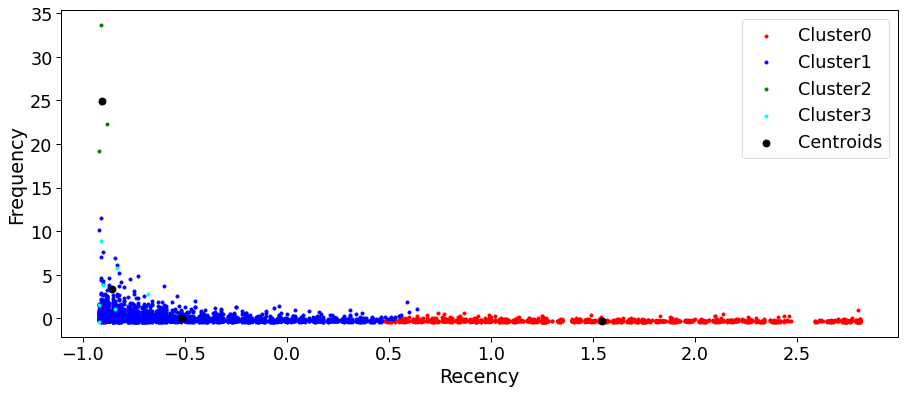

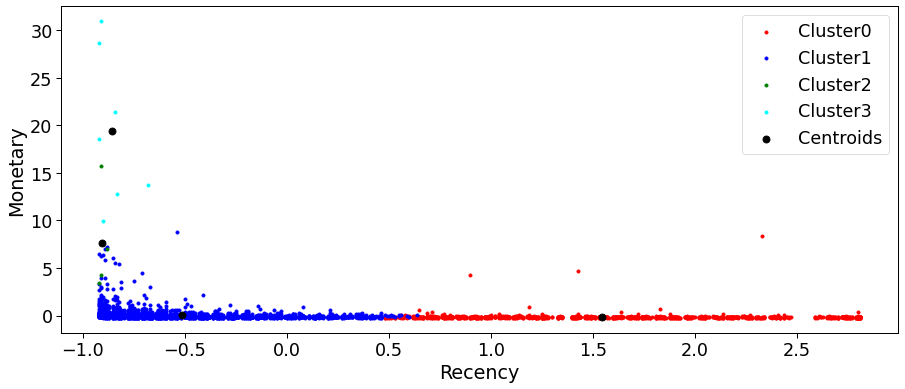

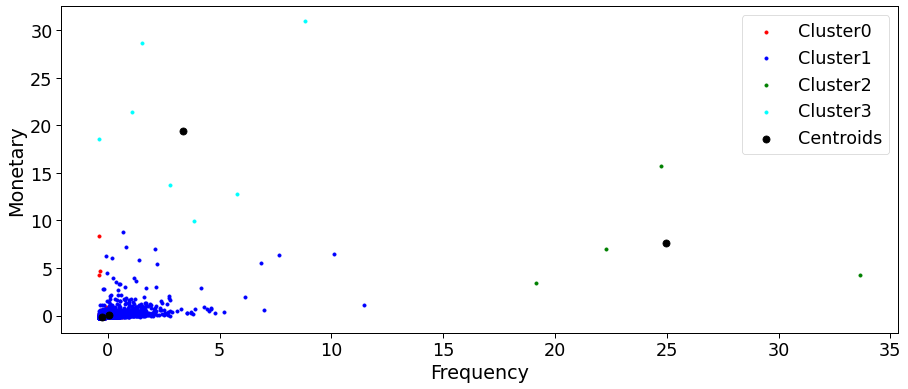

In [61]:
# Plotting two dimesional plots of each attributes respectively.
X = standard.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(standard.columns[i])
        plt.ylabel(standard.columns[j])
        plt.legend()        
        plt.show();